In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step 1: Load the dataset
file_path = r"C:\Users\91942\OneDrive\Desktop\heart.csv"  
data = pd.read_csv(file_path)

In [3]:
# Step 2 : Explore the dataset
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [5]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [6]:
# Step 3: Define features and target variable
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable (presence of heart disease: 1/0)

In [7]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Step 5: Scale the features (optional but improves performance for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Step 6: Build and train ensemble models
# 6.1 Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# 6.2 Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [11]:
# Step 7: Evaluate both models
# Random Forest Evaluation
rf_preds = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_classification_report = classification_report(y_test, rf_preds)

In [12]:
# Gradient Boosting Evaluation
gb_preds = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_preds)
gb_classification_report = classification_report(y_test, gb_preds)

In [13]:
# Step 8: Display results
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(rf_classification_report)



Random Forest Model Evaluation:
Accuracy: 0.8360655737704918
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



In [14]:
print("\nGradient Boosting Model Evaluation:")
print(f"Accuracy: {gb_accuracy}")
print("Classification Report:")
print(gb_classification_report)


Gradient Boosting Model Evaluation:
Accuracy: 0.819672131147541
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [15]:
# Step 9: Feature Importance (Optional for interpretability)
rf_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

In [16]:
print("\nRandom Forest Feature Importances:")
print(rf_feature_importance)


Random Forest Feature Importances:
     Feature  Importance
2         cp    0.157392
7    thalach    0.117491
9    oldpeak    0.113399
12      thal    0.107062
4       chol    0.087131
11        ca    0.086078
0        age    0.077759
3   trestbps    0.074127
10     slope    0.059454
8      exang    0.057655
1        sex    0.030452
6    restecg    0.022112
5        fbs    0.009889


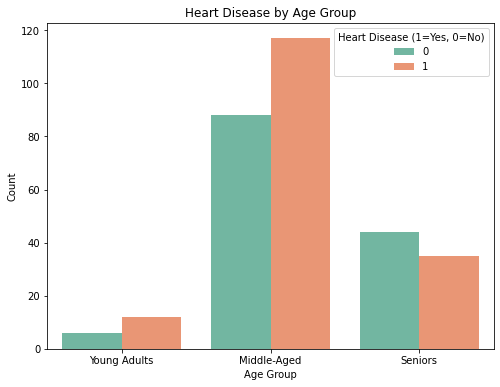

In [17]:
# Segment 1: Age Groups
# Young Adults: 29-40, Middle-Aged: 41-60, Seniors: 61+
data['age_group'] = pd.cut(data['age'], bins=[29, 40, 60, 100], labels=['Young Adults', 'Middle-Aged', 'Seniors'])

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='age_group', hue='target', palette='Set2')
plt.title('Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease (1=Yes, 0=No)')
plt.show()

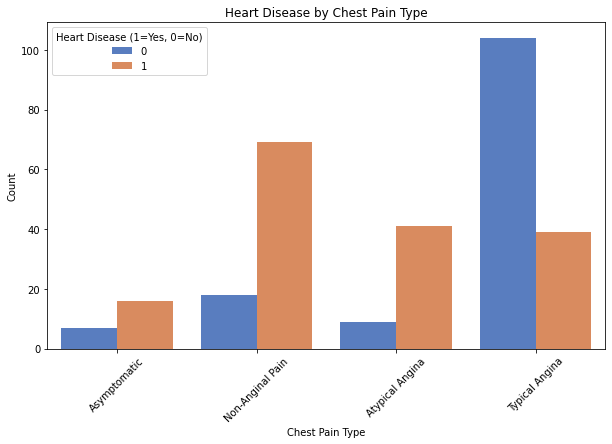

In [18]:
# Chest pain type and target
# Segment 2: Chest Pain Type (Categorical Segmentation)
# 0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic
chest_pain_mapping = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'}
data['chest_pain_type'] = data['cp'].map(chest_pain_mapping)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='chest_pain_type', hue='target', palette='muted')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease (1=Yes, 0=No)')
plt.xticks(rotation=45)
plt.show()

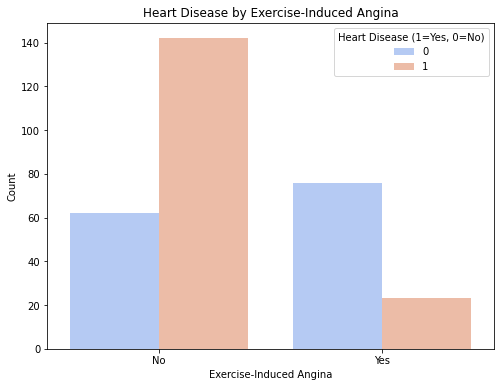

In [19]:
# Exercise-induced angina and target
# Segment 3: Exercise-Induced Angina (Yes/No)
data['exercise_angina'] = data['exang'].map({1: 'Yes', 0: 'No'})
plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='exercise_angina', hue='target', palette='coolwarm')
plt.title('Heart Disease by Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.legend(title='Heart Disease (1=Yes, 0=No)')
plt.show()

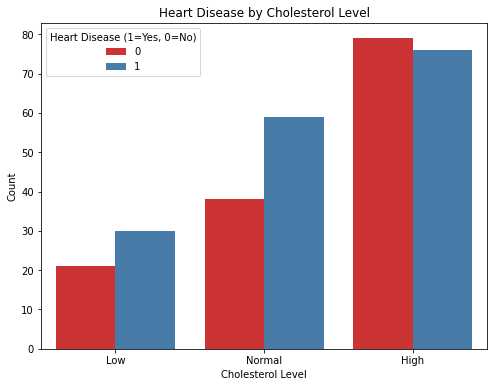

In [20]:
# Countplot for cholesterol levels and target
# Segment 2: Cholesterol Levels (Low: <200, Normal: 200-239, High: >=240)
data['cholesterol_level'] = pd.cut(data['chol'], bins=[0, 200, 239, np.inf], labels=['Low', 'Normal', 'High'])

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='cholesterol_level', hue='target', palette='Set1')
plt.title('Heart Disease by Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.legend(title='Heart Disease (1=Yes, 0=No)')
plt.show()


In [21]:
#  Summary statistics for segments
segment_summary = data.groupby(['age_group', 'cholesterol_level'])['target'].mean().reset_index()
segment_summary.rename(columns={'target': 'heart_disease_probability'}, inplace=True)

print("\nSegment Summary (Heart Disease Probability):")
print(segment_summary)


Segment Summary (Heart Disease Probability):
      age_group cholesterol_level  heart_disease_probability
0  Young Adults               Low                   0.777778
1  Young Adults            Normal                   0.500000
2  Young Adults              High                   0.666667
3   Middle-Aged               Low                   0.593750
4   Middle-Aged            Normal                   0.632353
5   Middle-Aged              High                   0.523810
6       Seniors               Low                   0.400000
7       Seniors            Normal                   0.545455
8       Seniors              High                   0.404255


In [22]:
# Step 10: Simple Financial Equation (Revenue Prediction Example)
def calculate_revenue(sales, product_unit_cost=500, monthly_cost=2000):
    """
    Calculate revenue based on the formula: y = product_unit_cost * sales - monthly_cost
    
    Parameters:
        sales (int): Number of units sold.
        product_unit_cost (int): Cost per unit of the product (default: Rs. 500).
        monthly_cost (int): Fixed monthly cost to run the business (default: Rs. 2000).
    
    Returns:
        int: Total revenue.
    """
    return product_unit_cost * sales - monthly_cost

In [23]:
# Example: Simulate revenue based on hypothetical correct predictions (sales)
hypothetical_sales = 300  # Assume we made 300 sales
revenue = calculate_revenue(hypothetical_sales)
print(f"\nHypothetical Revenue for {hypothetical_sales} sales: Rs. {revenue}")


Hypothetical Revenue for 300 sales: Rs. 148000
